# Interpreting aquifer tests

In [25]:
import lmfit as lm 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from scipy.special import exp1

def theis(r, t, S, T, Q=100):
    u = S * r ** 2 / (4.0 * T * t)
    s = Q / (4 * np.pi * T) * exp1(u)
    return s

In [26]:
xldata = pd.read_excel("walton_1962.xlsx", skiprows=[0,1,2,3,4,6], usecols="A,B")
xldata.tail()

,t,s
17,200,2.59080
18,260,2.80416
19,320,2.95656
20,380,3.10896
21,500,3.32232


In [27]:
def residual(p, data, r):
    p_vals = p.valuesdict()

    times = data['t'].values
    s_meas = data['s'].values
    
    rv = (s_meas - theis(r, times, p_vals['S'], p_vals['T'], p_vals['Q']))
        
    return rv


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 22
    # variables        = 2
    chi-square         = 0.01692867
    reduced chi-square = 8.4643e-04
    Akaike info crit   = -153.735356
    Bayesian info crit = -151.553271
[[Variables]]
    S:  2.0948e-05 +/- 4.0282e-07 (1.92%) (init = 0.0001)
    T:  0.08545715 +/- 8.3719e-04 (0.98%) (init = 0.01)
    Q:  0.8327902 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(S, T) = -0.882


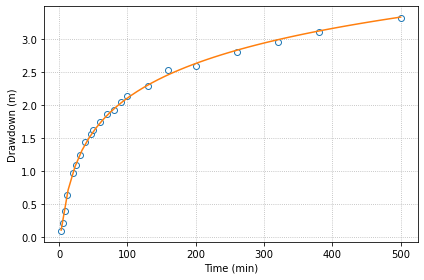

In [28]:
Q = 220 # gpm
Q *= 0.00378541 # m3
r = 824 # ft
r *= 0.3048

p = lm.Parameters()
p.add('S', value = 1e-4, min = 0., vary = True)
p.add('T', value = 1e-2, min = 0., vary = True)
p.add('Q', value = Q, vary = False)

p_out = lm.minimize(residual, p, args=(xldata, r))
                    
print(lm.fit_report(p_out))

S = p_out.params['S'].value
T = p_out.params['T'].value

fig, ax = plt.subplots()
ax.plot(xldata['t'], xldata['s'], 'o', mfc='w', mec='C0')
t = np.linspace(xldata['t'].min(), xldata['t'].max())
ax.plot(t, theis(r, t, S, T, Q))

ax.set_xlabel("Time (min)")
ax.set_ylabel("Drawdown (m)")
#ax.set_xlim(0, 24)
#ax.set_ylim(0, 0.65)
ax.grid(True, ls=':')

plt.tight_layout()
